1. **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
2. **Run all cells** (in the menubar, select Cell$\rightarrow$Run All).
3. __Use the__ `Validate` __button in the Assignments tab before submitting__.

__Include comments, derivations, explanations, graphs, etc.__ 

You __work in groups__ (= 3 people). __Write the full name and S/U-number of all team members!__

---


# Assignment 2 (Statistical Machine Learning 2024)
# **Deadline: 18 October 2024**

## Instructions
* Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE` __including comments, derivations, explanations, graphs, etc.__ 
Elements and/or intermediate steps required to derive the answer have to be in the report. If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends.
* __Please use LaTeX to write down equations/derivations/other math__! How to do that in Markdown cells can be found [here](https://www.fabriziomusacchio.com/blog/2021-08-10-How_to_use_LaTeX_in_Markdown/), a starting point for various symbols is [here](https://www.overleaf.com/learn/latex/Mathematical_expressions).
* Please do __not add new cells__ to the notebook, try to write the answers only in the provided cells. Before you turn the assignment in, make sure everything runs as expected.
* __Use the variable names given in the exercises__, do not assign your own variable names. 
* __Only one team member needs to upload the solutions__. This can be done under the Assignments tab, where you fetched the assignments, and where you can also validate your submissions. Please do not change the filenames of the individual Jupyter notebooks.

For any problems or questions regarding the assignments, ask during the tutorial or send an email to charlotte.cambiervannooten@ru.nl and janneke.verbeek@ru.nl .

## Introduction
Assignment 2 consists of:
1. __Classification and decision theory__ (30 points),
2. Bayesian linear regression (20 points),
3. Sequential learning (50 points).

## Libraries

Please __avoid installing new packages__, unless really necessary.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as ss

# Set fixed random seed for reproducibility
np.random.seed(2022)

## Exercise 1 - Probabilistic generative models (30 points)
The financial services department of an insurance company receives numerous phone calls each day from people who want to make a claim against their policy. Most claims are genuine, however about 1 out of every 6 are thought to be fraudulent. To tackle this problem the company has installed a trial version of a software voice-analysis system that monitors each conversation and gives a numerical score $z$ between 0 and 1, depending on allegedly suspicious vocal intonations of the customer. Unfortunately, nobody seems to know anymore how to interpret the score in this particular version of the system...

Tests revealed that the conditional probability density of $z$, given that a claim was valid ($c = 1$) or false ($c = 0$) are 
\begin{align}
p(z|c=0) & = & \alpha_0 (1 - z^2) \:,\\
p(z|c=1) & = & \alpha_1 z (z + 1) \:.
\end{align}

### Part 1
Derive the normalization constants $\alpha_0$ and $\alpha_1$.

To derive these normalization constants, we make use of the fact that these probability distributions must integrate to 1.

For $p(z \mid c = 0)$:

\begin{align}
\int_0^1 \alpha_0(1-z^2) dz &= 1 \\
\int_0^1 \alpha_0 - \alpha_0 z^2 dz &= 1 \\
\left[ \alpha_0 z - \frac{1}{3} \alpha_0 2^3 \right]_0^1 &= 1 \\
\left[ \alpha_0 - \frac{1}{3} \alpha_0 \right]_{z=1} - \left[ 0-0 \right]_{z=0} +C-C &= 1 \\
\frac{2}{3} \alpha_0 &= 1 \\
\alpha_0 &= \frac{3}{2}
\end{align}

For $p(z \mid c = 1)$:

\begin{align}
\int_0^1 \alpha_1z(z+1) dz &= 1 \\
\int_0^1 \alpha_1z^2 + \alpha_1z dz &= 1 \\
\left[ \frac{1}{3}\alpha_1 z^3 + \frac{1}{2}\alpha_1 z^2 \right]_0^1 &= 1 \\
\left[ \frac{1}{3} \alpha_1 + \frac{1}{2} \alpha_1 \right]_{z=1} - \left[ 0-0 \right]_{z=0} +C-C&= 1 \\
\frac{5}{6} \alpha_1 &= 1 \\
\alpha_1 &= \frac{6}{5}

\end{align}



Add the results you got for $\alpha_0$ and $\alpha_1$ into the cell below. (Add them as fractions, not as estimates. For example, write 1/3, do not round to a number of decimals.)

In [3]:
"""
The variable alpha_0 is the normalization constant for p(z | c = 0).
The variable alpha_1 is the normalization constant for p(z | c = 1)
"""
# YOUR CODE HERE
alpha_0 = 3/2
alpha_1 = 6/5

In [4]:
"""
Hidden check for value of variables alpha_0 and alpha_1.
"""

'\nHidden check for value of variables alpha_0 and alpha_1.\n'

How does the $z$ score relate to the validity of the claim? What values for $z$ would you expect when the claim is valid / false?

When the claim is valid, I would expect for z to be high (closer to 1), and when false, to be closer to zero. However, the relationship is not symmetric.

We can calculate the expected values of each probability density, using the formula: $\int_0^1 zp(z \mid c) dz$, for each $c=0$ and $c=1$. 
This gives us $\frac{3}{8}$ and $\frac{7}{10}$, respectively.

Plot $p(z | c = 0)$ and $p(z | c = 1)$ to visualize the conditional probability densities.

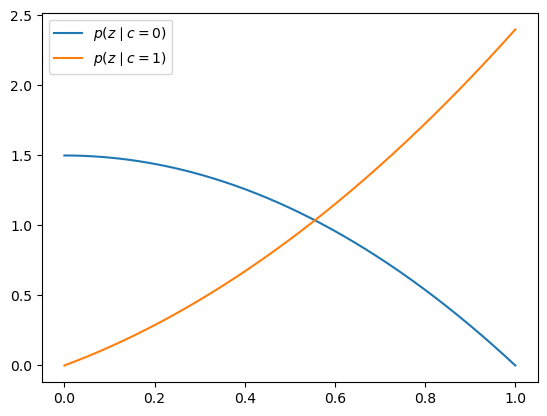

In [5]:
"""
Plot of p(z | c = 0) and p(z | c = 1).
"""
# YOUR CODE HERE
xs = np.linspace(0, 1, 500)

def pzc0(alpha_0, z):
  return alpha_0*(1-z**2)

def pzc1(alpha_1, z):
  return alpha_1*z*(z+1)

plt.plot(xs, pzc0(alpha_0, xs), label=r"$p(z \mid c = 0)$")
plt.plot(xs, pzc1(alpha_1, xs), label=r"$p(z \mid c = 1)$")
plt.legend()
plt.show()

### Part 2
Use the sum and product rule to show that the probability distribution function $p(z)$ can be written as
\begin{equation} 
p(z) = \frac{(3z + 1)(z + 1)}{4} \tag{1}.
\end{equation}
Check that the result is properly normalized.

YOUR ANSWER HERE

### Part 3
Use Bayes' rule to compute the posterior probability distribution function $p(c|z)$.

YOUR ANSWER HERE

Plot these distributions as a function of $z$.

In [6]:
"""
Plot of p(c = 0 | z), p(c = 1 | z) and decision boundary.
"""
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

How can these posterior probabilities help in making a decision regarding the validity of the claim? Can you think of a way of using this system that makes economic sense for the company? Explain how or why not.

YOUR ANSWER HERE

### Part 4
Compute the optimal decision boundary (based on our numerical score $z$) that minimizes the misclassification rate. For which $z$ should we classify $c = 0$ (false) and for which $z$ should we classify $c = 1$ (valid)? Explain your decision.

YOUR ANSWER HERE

### Part 5
Compute the misclassification rate, given the optimal decision boundary determined previously. Interpret the result you have obtained. Is the $z$ score useful in determining the validity of the claim?

YOUR ANSWER HERE